In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from data import data_preprocess
from evaluation import metrics
from model import end2end

In [2]:
x_train, y_train, x_test, y_test = data_preprocess.data_preprocess('cpu')

In [3]:
y_mean = torch.mean(y_train)
y_sd = torch.std(y_train)

y_train = (y_train - y_mean) / y_sd

In [4]:
end2end_model = end2end.train_model(x_train, y_train, n_epoch = 500, hidden_layers = [10, 10], learning_rate = 0.001, calibration_threshold = .03)

initial loss:  1.773250699043274
final loss:  -3.372697353363037


End2end test MAPE:  0.35441056


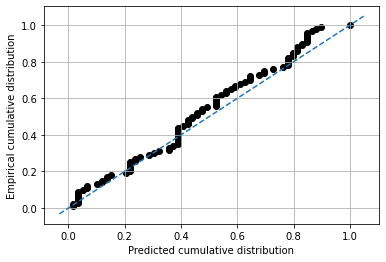

End2end test calibration error when step size is 0.001:  2.6823893995978176
End2end test calibration error when step size is 0.01:  0.2585162309681128
End2end test calibration error when step size is 0.1:  0.02041080149382362


In [5]:
mean_pred, var_pred = end2end_model(x_test)
mean_pred = mean_pred.detach().numpy() * y_sd.detach().numpy()+ y_mean.detach().numpy()
var_pred = var_pred.detach().numpy() * torch.pow(y_sd, 2).detach().numpy()

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))